MNIST Classifier.

In [139]:
import tensorflow as tf
print("version: " + tf.__version__)

version: 2.16.1


In [101]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [102]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [125]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

/opt/homebrew/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [126]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.19962753, -0.6571237 , -0.39054263,  0.24257585,  0.4822284 ,
        -0.4133595 ,  0.15651873,  0.10755495, -0.08692203,  0.5656634 ]],
      dtype=float32)

In [127]:
tf.nn.softmax(predictions).numpy()

array([[0.07778084, 0.04922486, 0.06426274, 0.12103725, 0.15381506,
        0.06281307, 0.11105675, 0.10574997, 0.08706026, 0.16719921]],
      dtype=float32)

In [128]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [129]:
loss_fn(y_train[:1], predictions).numpy()

2.7675922

In [130]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [131]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8516 - loss: 0.4860
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9615 - loss: 0.1271
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9733 - loss: 0.0871
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9801 - loss: 0.0659
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9844 - loss: 0.0512
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9860 - loss: 0.0429
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9873 - loss: 0.0381
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9891 - loss: 0.0315
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9906 - loss: 0.0278
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9905 - loss: 0.0258


In [132]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - 468us/step - accuracy: 0.9812 - loss: 0.0768


[0.07679037749767303, 0.9811999797821045]

In [133]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [136]:
probability_model(x_test[:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[1.2156746e-11, 2.9993633e-11, 7.0159087e-09, 8.0752434e-06,
        1.2397733e-13, 1.3358649e-08, 2.6071520e-17, 9.9998844e-01,
        1.0844545e-12, 3.4250170e-06]], dtype=float32)>

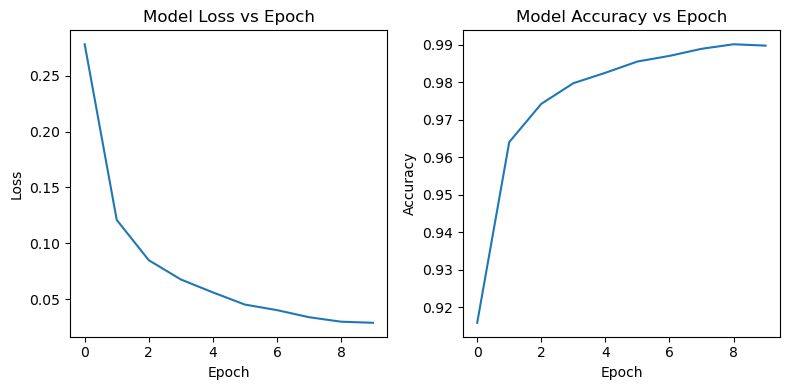

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Model Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Plot the training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()